## Pre processing kaggle data

In [1]:
import json
import pandas as pd
import os
from pathlib import Path

def explore_json_file(file_path, description):
    """Explore a JSON file and print its structure and content summary"""
    print(f"\n{'='*80}")
    print(f"Exploring: {description}")
    print(f"File: {file_path}")
    print('='*80)
    
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    # Print top-level keys
    print("\nTop-level keys in the JSON:")
    for key in data.keys():
        if isinstance(data[key], list):
            print(f"- {key}: List with {len(data[key])} items")
        else:
            print(f"- {key}: {type(data[key])}")
    
    # If there are images, create a DataFrame
    if 'images' in data:
        images_df = pd.DataFrame(data['images'])
        print("\nSample of images data:")
        print(images_df.head())
        print("\nImages DataFrame columns:")
        print(images_df.columns.tolist())
    
    # If there are annotations, create a DataFrame
    if 'annotations' in data:
        annotations_df = pd.DataFrame(data['annotations'])
        print("\nSample of annotations data:")
        print(annotations_df.head())
        print("\nAnnotations DataFrame columns:")
        print(annotations_df.columns.tolist())

def explore_data_folder(data_path):
    """Explore the contents of the data folder"""
    print("\n{'='*80}")
    print(f"Exploring data folder: {data_path}")
    print('='*80)
    
    # Get all files in the data folder
    files = list(Path(data_path).glob('*'))
    
    # Count file types
    extensions = {}
    for file in files:
        ext = file.suffix
        extensions[ext] = extensions.get(ext, 0) + 1
    
    print("\nFile types in data folder:")
    for ext, count in extensions.items():
        print(f"- {ext}: {count} files")
    
    # If there are JSON files in the data folder, examine one
    json_files = list(Path(data_path).glob('*.json'))
    if json_files:
        print("\nExamining first JSON file in data folder:")
        with open(json_files[0], 'r') as f:
            sample_data = json.load(f)
        print(f"\nStructure of {json_files[0].name}:")
        print(pd.json_normalize(sample_data).head())

def main():
    base_path = '/home/faizal/work/gnprc-domi-app/datasets/archive/sample_synth_datasets/ds5.0'
    data_path = os.path.join(base_path, 'data')
    
    # Explore main COCO file
    explore_json_file(
        os.path.join(base_path, 'coco.json'),
        "Main COCO file"
    )
    
    # Explore train instance annotations
    explore_json_file(
        os.path.join(base_path, 'train__inst_coco.json'),
        "Train instance annotations"
    )
    
    # Explore train keypoints annotations
    explore_json_file(
        os.path.join(base_path, 'train__kpts_coco.json'),
        "Train keypoints annotations"
    )
    
    # Explore validation instance annotations
    explore_json_file(
        os.path.join(base_path, 'val__inst_coco.json'),
        "Validation instance annotations"
    )
    
    # Explore validation keypoints annotations
    explore_json_file(
        os.path.join(base_path, 'val__kpts_coco.json'),
        "Validation keypoints annotations"
    )
    
    # Explore data folder structure
    explore_data_folder(data_path)

if __name__ == '__main__':
    main()


Exploring: Main COCO file
File: /home/faizal/work/gnprc-domi-app/datasets/archive/sample_synth_datasets/ds5.0/coco.json

Top-level keys in the JSON:
- info: <class 'dict'>
- licenses: <class 'dict'>
- images: List with 1000 items
- categories: List with 4 items
- annotations: List with 8000 items

Sample of images data:
   id                    file_name  height  width  licence
0   1  data/v_0001_f_0000_rgba.png    1024   1024        1
1   2  data/v_0002_f_0000_rgba.png    1024   1024        1
2   3  data/v_0003_f_0000_rgba.png    1024   1024        1
3   4  data/v_0004_f_0000_rgba.png    1024   1024        1
4   5  data/v_0005_f_0000_rgba.png    1024   1024        1

Images DataFrame columns:
['id', 'file_name', 'height', 'width', 'licence']

Sample of annotations data:
   category_id category_name  instance_id      area  \
0            1          dial            1   18423.0   
1            2        casing            2  216216.0   
2            3    face_plate            3  129954.0 

In [3]:
import os
import json
import pandas as pd
import math

# Path to the data folder containing images and JSON files
data_folder = "/home/faizal/work/gnprc-domi-app/datasets/archive/sample_synth_datasets/ds5.0/data"

# Initialize an empty list to store rows for the DataFrame
data_rows = []

# Loop through each JSON file in the data folder
for file_name in os.listdir(data_folder):
    if file_name.endswith(".json"):
        json_path = os.path.join(data_folder, file_name)
        
        # Open and load JSON file
        with open(json_path, 'r') as f:
            data = json.load(f)  # Load JSON data (likely a list)
        
        # Ensure data is a list
        if isinstance(data, list):
            # Iterate over each element in the list
            for item in data:
                # Extract image name (corresponding PNG file)
                image_name = file_name.replace(".json", ".png")
                
                # Extract values from the current item
                min_value = item.get("synth_dial_min_Image", None)
                max_value = item.get("synth_dial_max_Image", None)
                min_angle = item.get("synth_dial_min_World", None)
                max_angle = item.get("synth_dial_max_World", None)
                
                # Ensure all required data is present
                if min_value and max_value and min_angle and max_angle:
                    # Add to the list as a row
                    data_rows.append({
                        "image_name": image_name,
                        "min_value": min_value,
                        "max_value": max_value,
                        "min_angle": min_angle,
                        "max_angle": max_angle
                    })
        else:
            print(f"Unexpected structure in file: {file_name}")

# Create DataFrame
df = pd.DataFrame(data_rows)

# Save the DataFrame for future use (optional)
output_csv = "training_data.csv"
df.to_csv(output_csv, index=False)

# Display the first few rows of the DataFrame
print(df.head())

               image_name   min_value   max_value  \
0  v_0977_f_0000_rgba.png  [492, 533]  [492, 533]   
1  v_0505_f_0000_rgba.png  [561, 448]  [561, 448]   
2  v_0191_f_0000_rgba.png  [726, 384]  [726, 384]   
3  v_0465_f_0000_rgba.png  [657, 603]  [657, 603]   
4  v_0268_f_0000_rgba.png  [619, 548]  [619, 548]   

                          min_angle                        max_angle  
0   [-0.591932, -0.235341, -0.0102]   [0.591932, -0.235341, -0.0102]  
1   [-0.602699, -0.206211, -0.0102]   [0.602699, -0.206211, -0.0102]  
2  [-0.636221, -0.0314974, -0.0102]  [0.636221, -0.0314974, -0.0102]  
3     [-0.472333, -0.4274, -0.0102]     [0.472333, -0.4274, -0.0102]  
4   [-0.500288, -0.394311, -0.0102]   [0.500288, -0.394311, -0.0102]  


In [5]:
import os
import json
import pandas as pd
from pathlib import Path

def analyze_json_file(file_path):
    """Analyze a single JSON file from the data directory"""
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    # Check if the data is a list or a dictionary
    if isinstance(data, dict):
        # Extract all available keys for dictionary data
        print(f"\nAnalyzing file: {os.path.basename(file_path)}")
        print("Available keys:", list(data.keys()))
        
        # Print a formatted sample of the first few entries
        print("\nDetailed structure of first entry:")
        for key, value in data.items():
            print(f"{key}: {value}")
    elif isinstance(data, list):
        # Handle the case where data is a list
        print(f"\nAnalyzing file: {os.path.basename(file_path)} (List detected)")
        print("List contains", len(data), "items.")
        for i, item in enumerate(data[:2]):  # Displaying first 2 items for inspection
            print(f"Item {i+1}:")
            for key, value in item.items():
                print(f"  {key}: {value}")
    else:
        print(f"Unexpected data type in file: {os.path.basename(file_path)}")
        
    return data

def analyze_multiple_files(data_dir, num_samples=5):
    """Analyze multiple JSON files to find patterns"""
    all_data = []
    
    # Get all JSON files in the directory
    json_files = list(Path(data_dir).glob('*.json'))
    
    for json_file in json_files[:num_samples]:
        data = analyze_json_file(json_file)
        
        # Extract relevant information
        file_info = {
            'filename': os.path.basename(json_file),
            'min_value': None,
            'max_value': None,
            'min_angle': None,
            'max_angle': None
        }
        
        # Try to find gauge-related information
        if isinstance(data, dict) and 'gauge' in data:
            file_info.update({
                'gauge_info': data['gauge']
            })
        
        # Look for additional fields that might contain reading information
        for key in data.keys() if isinstance(data, dict) else []:
            if 'reading' in key.lower() or 'value' in key.lower():
                file_info[f'additional_{key}'] = data[key]
        
        all_data.append(file_info)
    
    # Convert to DataFrame for easier analysis
    df = pd.DataFrame(all_data)
    print("\nSummary of analyzed files:")
    print(df)
    
    # Check for patterns in the data
    print("\nUnique values analysis:")
    for column in df.columns:
        if df[column].nunique() > 0:
            print(f"\n{column} unique values:")
            print(df[column].value_counts().head())

def main():
    data_dir = '/home/faizal/work/gnprc-domi-app/datasets/archive/sample_synth_datasets/ds5.0/data'
    analyze_multiple_files(data_dir)

if __name__ == '__main__':
    main()


Analyzing file: v_0977_f_0000_rgba.json (List detected)
List contains 8 items.
Item 1:
  category_id: 1
  category_name: dial
  instance_id: 1
  area: 19008.0
  bbox: [425.0, 501.0, 216.0, 88.0]
  camera_matrix: [0.9816730618476868, -0.034350380301475525, 0.18745137751102448, 0.0, 0.03396357595920563, 0.9994091391563416, 0.005275798961520195, 0.0, -0.18752184510231018, 0.001187409507110715, 0.9822596907615662, 0.0, -0.7981177568435669, 0.08556943386793137, 4.6038432121276855, 1.0]
  camera_focal_length: 50.0
  synth_dial_value: 7.91772
  segmentation: {'size': [1024, 1024], 'counts': 'S`Y=1mo07F6N1N2N2N201O10N101O010O001O10N11O1O0010O01O1O010O0000100O00010O001O010O0010O00010O0001O010O01^POC_o0b0N2M2N2N1N2N^OnPOG79in0O\\QO0dn0O_QO0_n00cQOO]n00eQO1Xn0OjQOOWn01jQOOUn00mQO0Qn01nQOOSn00nQO1Qn0OPRO0Pn00PRO0Pn00PRO0Pn00PRO1om0OQRO0Pn00PRO0Pn00PRO0Qn0OoQO0Rn01mQOOSn01lQO0Un00iQO0Xn00gQO1Zn0OdQO2\\n00bQOO`n00_QO0cn02XQOOjn00mPOJ19To0<4N101N5_O_PO:do0N12ON100100O0001O010O00010O0010O0001O01O010O

In [7]:
import os
import json
import pandas as pd
from pathlib import Path

def parse_gauge_data(data_dir):
    """Parse gauge data from JSON files in the data directory"""
    gauge_data = []
    
    # Get all JSON files in the directory
    json_files = list(Path(data_dir).glob('*.json'))
    
    for json_file in json_files:
        with open(json_file, 'r') as f:
            data = json.load(f)
        
        # Initialize variables
        dial_value = None
        image_name = os.path.splitext(json_file.name)[0] + '.png'
        
        # Look for dial information
        for item in data:
            if isinstance(item, dict):
                if item.get('category_name') == 'dial':
                    dial_value = item.get('synth_dial_value')
                    # Get the bounding box for the dial
                    bbox = item.get('bbox', [])
                    # Get camera information
                    camera_matrix = item.get('camera_matrix', [])
                    break
        
        if dial_value is not None:
            gauge_data.append({
                'image_name': image_name,
                'dial_value': dial_value,
                'bbox': bbox,
                'camera_matrix': camera_matrix
            })
    
    # Convert to DataFrame
    df = pd.DataFrame(gauge_data)
    return df

def analyze_gauge_data(df):
    """Analyze the extracted gauge data"""
    print("\nDataset Summary:")
    print(f"Total number of images: {len(df)}")
    print("\nDial Value Statistics:")
    print(df['dial_value'].describe())
    
    # Display first few entries
    print("\nFirst few entries:")
    print(df.head())
    
    return df

def main():
    data_dir = '/home/faizal/work/gnprc-domi-app/datasets/archive/sample_synth_datasets/ds5.0/data'
    
    # Parse the data
    df = parse_gauge_data(data_dir)
    
    # Analyze the data
    df = analyze_gauge_data(df)
    
    # Save to CSV for reference
    df.to_csv('gauge_readings.csv', index=False)
    print("\nData saved to gauge_readings.csv")

if __name__ == '__main__':
    main()


Dataset Summary:
Total number of images: 1000

Dial Value Statistics:
count    1000.000000
mean        2.526171
std         2.685015
min        -2.200000
25%         0.334134
50%         2.200000
75%         4.348150
max        10.095900
Name: dial_value, dtype: float64

First few entries:
               image_name  dial_value                          bbox  \
0  v_0977_f_0000_rgba.png    7.917720   [425.0, 501.0, 216.0, 88.0]   
1  v_0505_f_0000_rgba.png    3.495290   [543.0, 288.0, 37.0, 228.0]   
2  v_0191_f_0000_rgba.png    1.767570  [605.0, 316.0, 176.0, 103.0]   
3  v_0465_f_0000_rgba.png    1.740540   [609.0, 406.0, 87.0, 284.0]   
4  v_0268_f_0000_rgba.png    0.718518  [441.0, 475.0, 257.0, 117.0]   

                                       camera_matrix  
0  [0.9816730618476868, -0.034350380301475525, 0....  
1  [0.9996006488800049, 0.02726796455681324, -0.0...  
2  [0.9500072002410889, 0.02983134798705578, -0.3...  
3  [0.9839928150177002, -0.03775220736861229, -0....  
4  [0.

## latest model training on kaggle data

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import pandas as pd
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

class GaugeDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the CSV with annotations
            img_dir (string): Directory with all the images
            transform (callable, optional): Optional transform to be applied on image
        """
        self.gauge_data = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.gauge_data)
    
    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.gauge_data.iloc[idx]['image_name'])
        image = Image.open(img_name).convert('RGB')
        
        # Get the gauge reading
        reading = self.gauge_data.iloc[idx]['dial_value']
        reading = torch.tensor(reading, dtype=torch.float32)
        
        if self.transform:
            image = self.transform(image)
            
        return image, reading

class GaugeResNet(nn.Module):
    def __init__(self):
        super(GaugeResNet, self).__init__()
        # Load pretrained ResNet50
        self.resnet = models.resnet50(pretrained=True)
        
        # Replace final layer with one output (gauge reading)
        num_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Sequential(
            nn.Linear(num_features, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1)
        )
    
    def forward(self, x):
        return self.resnet(x)

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device='cuda'):
    model = model.to(device)
    best_val_loss = float('inf')
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        for images, readings in train_loader:
            images = images.to(device)
            readings = readings.to(device).view(-1, 1)  # Reshape to match model output
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, readings)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        predictions = []
        actual_values = []
        
        with torch.no_grad():
            for images, readings in val_loader:
                images = images.to(device)
                readings = readings.to(device).view(-1, 1)
                outputs = model(images)
                loss = criterion(outputs, readings)
                val_loss += loss.item()
                
                predictions.extend(outputs.cpu().numpy())
                actual_values.extend(readings.cpu().numpy())
        
        epoch_train_loss = running_loss / len(train_loader)
        epoch_val_loss = val_loss / len(val_loader)
        
        # Calculate mean absolute error for validation set
        mae = np.mean(np.abs(np.array(predictions) - np.array(actual_values)))
        
        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Training Loss: {epoch_train_loss:.4f}')
        print(f'Validation Loss: {epoch_val_loss:.4f}')
        print(f'Validation MAE: {mae:.4f}\n')
        
        # Save best model
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            torch.save(model.state_dict(), 'best_gauge_model.pth')

def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)
    
    # Define transforms
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Create dataset
    dataset = GaugeDataset(
        csv_file='gauge_readings.csv',
        img_dir='/home/faizal/work/gnprc-domi-app/datasets/archive/sample_synth_datasets/ds5.0/data',
        transform=transform
    )
    
    # Split dataset
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
    
    # Initialize model, criterion, and optimizer
    model = GaugeResNet()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Train the model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20, device=device)

if __name__ == '__main__':
    main()

/home/faizal/work/gnprc-domi-app/tf/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/faizal/work/gnprc-domi-app/tf/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20:
Training Loss: 5.4284
Validation Loss: 38.8960
Validation MAE: 5.0641

Epoch 2/20:
Training Loss: 2.1265
Validation Loss: 6.8288
Validation MAE: 2.1945

Epoch 3/20:
Training Loss: 1.3206
Validation Loss: 2.7397
Validation MAE: 1.2573

Epoch 4/20:
Training Loss: 1.2458
Validation Loss: 0.6344
Validation MAE: 0.5838

Epoch 5/20:
Training Loss: 0.9535
Validation Loss: 0.4248
Validation MAE: 0.4578

Epoch 6/20:
Training Loss: 0.8014
Validation Loss: 0.9475
Validation MAE: 0.7226

Epoch 7/20:
Training Loss: 0.7030
Validation Loss: 0.2632
Validation MAE: 0.3910

Epoch 8/20:
Training Loss: 0.7222
Validation Loss: 0.3935
Validation MAE: 0.4120

Epoch 9/20:
Training Loss: 0.7337
Validation Loss: 0.3305
Validation MAE: 0.3733

Epoch 10/20:
Training Loss: 0.6692
Validation Loss: 0.7411
Validation MAE: 0.6063

Epoch 11/20:
Training Loss: 0.9866
Validation Loss: 0.4289
Validation MAE: 0.5010

Epoch 12/20:
Training Loss: 0.7454
Validation Loss: 0.5194
Validation MAE: 0.6032

Epoch 13/20:

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
import torchvision.transforms.functional as TF
import random
import numpy as np

class RangeConstrainedGaugeResNet(nn.Module):
    def __init__(self, min_value=0, max_value=10):
        super(RangeConstrainedGaugeResNet, self).__init__()
        self.min_value = min_value
        self.max_value = max_value
        
        # Load pretrained ResNet50
        self.resnet = models.resnet50(pretrained=True)
        
        # Replace final layers
        num_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Sequential(
            nn.Linear(num_features, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1),
            # Sigmoid activation to bound output between 0 and 1
            nn.Sigmoid()
        )
    
    def forward(self, x):
        # Get value between 0 and 1 from the model
        normalized_value = self.resnet(x)
        # Scale to range [min_value, max_value]
        scaled_value = normalized_value * (self.max_value - self.min_value) + self.min_value
        return scaled_value

class GaugeDatasetAugmented(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.gauge_data = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        
    def apply_random_augmentation(self, image):
        # Random brightness adjustment
        brightness_factor = random.uniform(0.8, 1.2)
        image = TF.adjust_brightness(image, brightness_factor)
        
        # Random contrast adjustment
        contrast_factor = random.uniform(0.8, 1.2)
        image = TF.adjust_contrast(image, contrast_factor)
        
        # Random noise
        if random.random() > 0.5:
            image = np.array(image)
            noise = np.random.normal(0, 10, image.shape)
            image = np.clip(image + noise, 0, 255).astype(np.uint8)
            image = Image.fromarray(image)
            
        return image
    
    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.gauge_data.iloc[idx]['image_name'])
        image = Image.open(img_name).convert('RGB')
        
        # Apply random augmentation
        image = self.apply_random_augmentation(image)
        
        reading = self.gauge_data.iloc[idx]['dial_value']
        reading = torch.tensor(reading, dtype=torch.float32)
        
        if self.transform:
            image = self.transform(image)
            
        return image, reading

def train_model_with_validation(model, train_loader, val_loader, criterion, optimizer, 
                              num_epochs=20, device='cuda', early_stopping_patience=5):
    model = model.to(device)
    best_val_loss = float('inf')
    patience_counter = 0
    
    # Training history
    history = {'train_loss': [], 'val_loss': [], 'val_mae': []}
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        
        for images, readings in train_loader:
            images = images.to(device)
            readings = readings.to(device).view(-1, 1)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, readings)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_mae = 0.0
        val_predictions = []
        
        with torch.no_grad():
            for images, readings in val_loader:
                images = images.to(device)
                readings = readings.to(device).view(-1, 1)
                outputs = model(images)
                loss = criterion(outputs, readings)
                val_loss += loss.item()
                val_mae += torch.abs(outputs - readings).mean().item()
                val_predictions.extend(outputs.cpu().numpy())
        
        # Calculate epoch metrics
        epoch_train_loss = running_loss / len(train_loader)
        epoch_val_loss = val_loss / len(val_loader)
        epoch_val_mae = val_mae / len(val_loader)
        
        # Update history
        history['train_loss'].append(epoch_train_loss)
        history['val_loss'].append(epoch_val_loss)
        history['val_mae'].append(epoch_val_mae)
        
        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Training Loss: {epoch_train_loss:.4f}')
        print(f'Validation Loss: {epoch_val_loss:.4f}')
        print(f'Validation MAE: {epoch_val_mae:.4f}\n')
        
        # Early stopping
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            torch.save(model.state_dict(), 'best_gauge_model.pth')
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print("Early stopping triggered!")
                break
    
    return history

def main():
    # Set seeds for reproducibility
    torch.manual_seed(42)
    random.seed(42)
    np.random.seed(42)
    
    # Define transforms with additional augmentation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomRotation(5),  # Slight rotation
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Initialize model and training components
    model = RangeConstrainedGaugeResNet(min_value=0, max_value=10)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Reduced learning rate

    # Create dataset
    dataset = GaugeDataset(
        csv_file='gauge_readings.csv',
        img_dir='/home/faizal/work/gnprc-domi-app/datasets/archive/sample_synth_datasets/ds5.0/data',
        transform=transform
    )
    
    # Split dataset
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
    
    # Rest of the training setup...
    # Train the model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20, device=device)
    
if __name__ == '__main__':
    main()

Epoch 1/20:
Training Loss: 6.4013
Validation Loss: 5.0040
Validation MAE: 1.7409

Epoch 2/20:
Training Loss: 2.0679
Validation Loss: 1.7807
Validation MAE: 0.9317

Epoch 3/20:
Training Loss: 1.1242
Validation Loss: 0.8504
Validation MAE: 0.6843

Epoch 4/20:
Training Loss: 0.6981
Validation Loss: 0.5483
Validation MAE: 0.5732

Epoch 5/20:
Training Loss: 0.5701
Validation Loss: 0.5171
Validation MAE: 0.5231

Epoch 6/20:
Training Loss: 0.5659
Validation Loss: 0.8197
Validation MAE: 0.6686

Epoch 7/20:
Training Loss: 0.4723
Validation Loss: 0.5368
Validation MAE: 0.4653

Epoch 8/20:
Training Loss: 0.4282
Validation Loss: 0.4801
Validation MAE: 0.4781

Epoch 9/20:
Training Loss: 0.4265
Validation Loss: 0.8662
Validation MAE: 0.6416

Epoch 10/20:
Training Loss: 0.4606
Validation Loss: 0.3939
Validation MAE: 0.4556

Epoch 11/20:
Training Loss: 0.4042
Validation Loss: 0.3848
Validation MAE: 0.4595

Epoch 12/20:
Training Loss: 0.3891
Validation Loss: 0.3804
Validation MAE: 0.4289

Epoch 13/20:


## Testing

Using device: cuda


/home/faizal/work/gnprc-domi-app/tf/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/faizal/work/gnprc-domi-app/tf/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/tmp/ipykernel_17551/1479560474.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/b

Model loaded successfully


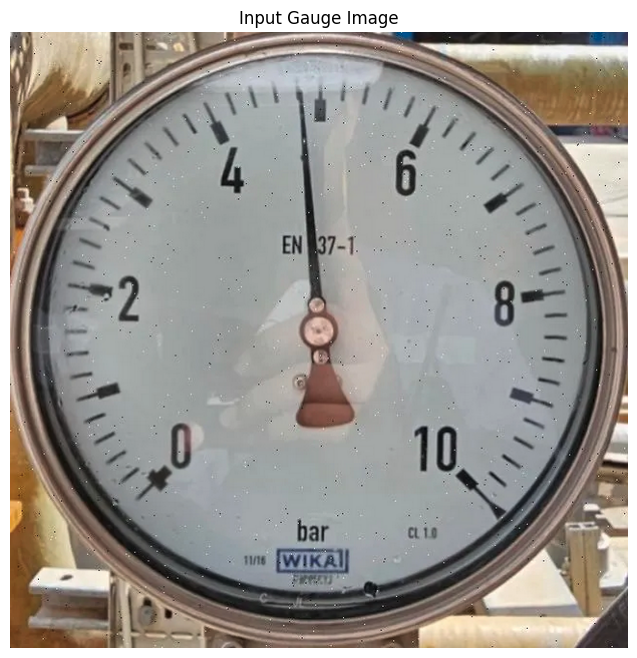


Predicted Gauge Reading: 0.03


In [11]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

def load_model(model_path):
    """Load the trained model"""
    model = RangeConstrainedGaugeResNet()
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model

def predict_gauge(model, image_path, device='cuda'):
    """Make prediction on a single image"""
    # Load and preprocess the image
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Load image
    image = Image.open(image_path).convert('RGB')
    
    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.title('Input Gauge Image')
    plt.show()
    
    # Preprocess
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    image_tensor = image_tensor.to(device)
    
    # Make prediction
    with torch.no_grad():
        output = model(image_tensor)
        predicted_value = output.item()
    
    return predicted_value

def main():
    # Paths
    model_path = 'best_gauge_model.pth'
    image_path = '/home/faizal/work/gnprc-domi-app/Model/images/guage_image.jpg'
    
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Load model
    try:
        model = load_model(model_path)
        model = model.to(device)
        print("Model loaded successfully")
        
        # Make prediction
        predicted_value = predict_gauge(model, image_path, device)
        print(f"\nPredicted Gauge Reading: {predicted_value:.2f}")
        
    except Exception as e:
        print(f"Error occurred: {str(e)}")

if __name__ == '__main__':
    main()

## Figuring out errors

/home/faizal/work/gnprc-domi-app/tf/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/faizal/work/gnprc-domi-app/tf/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/tmp/ipykernel_7099/1508551008.py:86: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/b

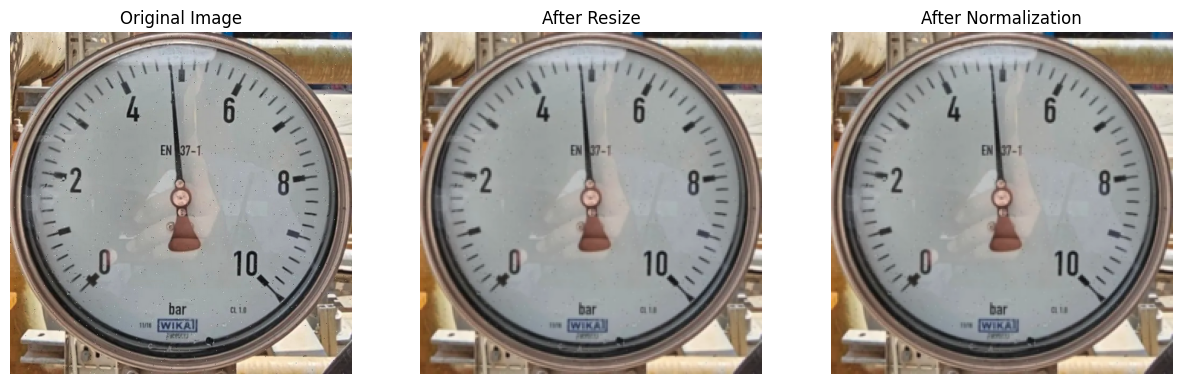


Prediction Analysis:
Predicted Value: 0.20
Average Feature Activation: 0.57


In [5]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def diagnostic_pipeline(image_path):
    """Show the image at each stage of preprocessing"""
    # Load original image
    original = Image.open(image_path).convert('RGB')
    
    # Define the same transforms we use in training
    transform_steps = {
        'original': transforms.Compose([]),
        'resized': transforms.Compose([
            transforms.Resize((224, 224))
        ]),
        'normalized': transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    }
    
    # Create subplot for each stage
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original
    axes[0].imshow(original)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    # Resized
    resized = transform_steps['resized'](original)
    axes[1].imshow(resized)
    axes[1].set_title('After Resize')
    axes[1].axis('off')
    
    # Normalized (need to denormalize for visualization)
    normalized = transform_steps['normalized'](original)
    denorm = normalized * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + \
             torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    denorm = denorm.permute(1, 2, 0).numpy()
    denorm = np.clip(denorm, 0, 1)
    
    axes[2].imshow(denorm)
    axes[2].set_title('After Normalization')
    axes[2].axis('off')
    
    plt.show()
    
    return normalized

def predict_with_confidence(model, image_tensor, device='cuda'):
    """Make prediction and analyze activation values"""
    model.eval()
    with torch.no_grad():
        # Get intermediate activations
        features = []
        def hook(module, input, output):
            features.append(output.detach())
        
        # Register hook on the last conv layer
        model.resnet.layer4.register_forward_hook(hook)
        
        # Make prediction
        image_tensor = image_tensor.unsqueeze(0).to(device)
        output = model(image_tensor)
        
        # Analyze feature activations
        feature_map = features[0]
        activation_strength = torch.mean(torch.abs(feature_map))
        
        print(f"\nPrediction Analysis:")
        print(f"Predicted Value: {output.item():.2f}")
        print(f"Average Feature Activation: {activation_strength.item():.2f}")
        
        return output.item(), activation_strength.item()

def main():
    image_path = '/home/faizal/work/gnprc-domi-app/Model/images/guage_image.jpg'
    model_path = 'best_gauge_model.pth'
    
    # Load model
    model = RangeConstrainedGaugeResNet()
    model.load_state_dict(torch.load(model_path))
    model = model.to('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Run diagnostics
    processed_image = diagnostic_pipeline(image_path)
    
    # Make prediction with analysis
    predict_with_confidence(model, processed_image)

if __name__ == '__main__':
    main()

## Aproaching problem step by step

### figuring out needle angle

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import cv2
import numpy as np
from PIL import Image
import math
import os

class GaugeDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = os.listdir(image_dir)
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.images[idx])
        mask_path = os.path.join(self.mask_dir, self.images[idx].replace('.jpg', '_mask.png'))
        
        image = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')
        
        if self.transform:
            image = self.transform(image)
            mask = transforms.ToTensor()(mask)
        
        return image, mask

def get_model():
    # Load pre-trained DeepLabV3 model with ResNet50 backbone
    model = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=True)
    
    # Modify the classifier for binary segmentation (needle vs background)
    model.classifier[4] = nn.Conv2d(256, 1, kernel_size=(1, 1), stride=(1, 1))
    
    return model

def calculate_angle(mask):
    """Calculate angle between needle and negative y-axis"""
    # Convert mask to binary
    binary = (mask > 0.5).astype(np.uint8)
    
    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        return None
    
    # Get the largest contour (should be the needle)
    needle = max(contours, key=cv2.contourArea)
    
    # Fit a line to the needle contour
    [vx, vy, x, y] = cv2.fitLine(needle, cv2.DIST_L2, 0, 0.01, 0.01)
    
    # Calculate angle with negative y-axis
    angle = math.degrees(math.atan2(vx[0], -vy[0]))
    
    # Normalize angle to be between 0 and 360 degrees
    if angle < 0:
        angle += 360
        
    return angle

def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        
        for images, masks in train_loader:
            images = images.to(device)
            masks = masks.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)['out']
            loss = criterion(outputs, masks)
            
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}')
    
    return model

def predict_angle(model, image_path):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    model.eval()
    
    # Prepare image
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    image = Image.open(image_path).convert('RGB')
    input_tensor = transform(image).unsqueeze(0).to(device)
    
    with torch.no_grad():
        output = model(input_tensor)['out']
        mask = torch.sigmoid(output).squeeze().cpu().numpy()
    
    angle = calculate_angle(mask)
    return angle

# Example usage
def main():
    # Set up data
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    dataset = GaugeDataset(
        image_dir='/home/faizal/work/gnprc-domi-app/datasets/archive/sample_synth_datasets/ds5.0/data',
        mask_dir='/home/faizal/work/gnprc-domi-app/datasets/archive/sample_synth_datasets/ds5.0/gtfs',
        transform=transform
    )
    
    train_loader = DataLoader(dataset, batch_size=8, shuffle=True)
    
    # Initialize model and training parameters
    model = get_model()
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    
    # Train model
    model = train_model(model, train_loader, criterion, optimizer)
    
    # Save model
    torch.save(model.state_dict(), 'gauge_reader_model.pth')
    
    # Example prediction
    angle = predict_angle(model, 'path/to/test/image.jpg')
    print(f'Predicted angle: {angle:.2f} degrees')

if __name__ == '__main__':
    main()

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import torchvision

class GaugeDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        
        # Get all image files
        self.images = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        # Filter to only include images that have corresponding masks
        self.valid_images = []
        for img_name in self.images:
            mask_name = os.path.splitext(img_name)[0] + '_mask.png'
            mask_path = os.path.join(mask_dir, mask_name)
            if os.path.exists(mask_path):
                self.valid_images.append(img_name)
        
        print(f"Found {len(self.images)} total images")
        print(f"Found {len(self.valid_images)} images with valid masks")
    
    def __len__(self):
        return len(self.valid_images)
    
    def __getitem__(self, idx):
        img_name = self.valid_images[idx]
        img_path = os.path.join(self.image_dir, img_name)
        mask_path = os.path.join(self.mask_dir, os.path.splitext(img_name)[0] + '_mask.png')
        
        try:
            image = Image.open(img_path).convert('RGB')
            mask = Image.open(mask_path).convert('L')
            
            # First resize both image and mask to the same size
            resize_transform = transforms.Resize((224, 224))
            image = resize_transform(image)
            mask = resize_transform(mask)
            
            if self.transform:
                image = self.transform(image)
                # For mask, we only want to convert to tensor, not apply normalization
                mask = transforms.ToTensor()(mask)
            
            return image, mask
        except Exception as e:
            print(f"Error loading {img_path}: {str(e)}")
            # Return a default/dummy sample in case of error
            return torch.zeros((3, 224, 224)), torch.zeros((1, 224, 224))
                
def get_model():
    # Load pre-trained DeepLabV3 model with ResNet50 backbone
    model = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=True)
    
    # Modify the classifier for binary segmentation (needle vs background)
    model.classifier[4] = nn.Conv2d(256, 1, kernel_size=(1, 1), stride=(1, 1))
    
    return model

def calculate_angle(mask):
    """Calculate angle between needle and negative y-axis"""
    # Convert mask to binary
    binary = (mask > 0.5).astype(np.uint8)
    
    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        return None
    
    # Get the largest contour (should be the needle)
    needle = max(contours, key=cv2.contourArea)
    
    # Fit a line to the needle contour
    [vx, vy, x, y] = cv2.fitLine(needle, cv2.DIST_L2, 0, 0.01, 0.01)
    
    # Calculate angle with negative y-axis
    angle = math.degrees(math.atan2(vx[0], -vy[0]))
    
    # Normalize angle to be between 0 and 360 degrees
    if angle < 0:
        angle += 360 
        
    return angle

def predict_angle(model, image_path):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    model.eval()
    
    # Prepare image
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    image = Image.open(image_path).convert('RGB')
    input_tensor = transform(image).unsqueeze(0).to(device)
    
    with torch.no_grad():
        output = model(input_tensor)['out']
        mask = torch.sigmoid(output).squeeze().cpu().numpy()
    
    angle = calculate_angle(mask)
    return angle


def main():
    # Set up data
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    dataset = GaugeDataset(
        image_dir='/home/faizal/work/gnprc-domi-app/datasets/archive/sample_synth_datasets/ds5.0/data',
        mask_dir='/home/faizal/work/gnprc-domi-app/datasets/archive/sample_synth_datasets/ds5.0/gtfs',
        transform=transform
    )
    
    # Split into train/validation sets
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
    
    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
    
    # Initialize model and training parameters
    model = get_model()
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    
    # Train model
    model = train_model(model, train_loader, val_loader, criterion, optimizer)
    
    # Save model
    torch.save(model.state_dict(), 'gauge_reader_model.pth')

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    best_val_loss = float('inf')
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        
        for images, masks in train_loader:
            images = images.to(device)
            masks = masks.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)['out']
            loss = criterion(outputs, masks)
            
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
        train_loss = running_loss/len(train_loader)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, masks in val_loader:
                images = images.to(device)
                masks = masks.to(device)
                
                outputs = model(images)['out']
                loss = criterion(outputs, masks)
                val_loss += loss.item()
        
        val_loss = val_loss/len(val_loader)
        
        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Training Loss: {train_loss:.4f}')
        print(f'Validation Loss: {val_loss:.4f}')
        
        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pth')
    
    return model

if __name__ == '__main__':
    main()

Found 1000 total images
Found 308 images with valid masks
Epoch 1/10
Training Loss: 0.6020
Validation Loss: 0.5037
Epoch 2/10
Training Loss: 0.3849
Validation Loss: 0.3796
Epoch 3/10
Training Loss: 0.3019
Validation Loss: 0.2982
Epoch 4/10
Training Loss: 0.2536
Validation Loss: 0.3045
Epoch 5/10
Training Loss: 0.2244
Validation Loss: 0.2164
Epoch 6/10
Training Loss: 0.1951
Validation Loss: 0.1906
Epoch 7/10
Training Loss: 0.1696
Validation Loss: 0.1658
Epoch 8/10
Training Loss: 0.1504
Validation Loss: 0.1762
Epoch 9/10
Training Loss: 0.1336
Validation Loss: 0.1398
Epoch 10/10
Training Loss: 0.1191
Validation Loss: 0.1167


Using device: cuda


/tmp/ipykernel_6641/1588690160.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path)


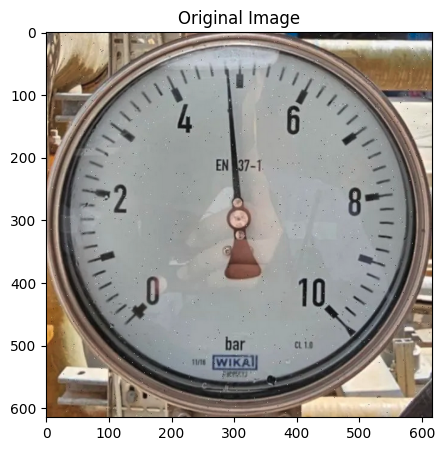

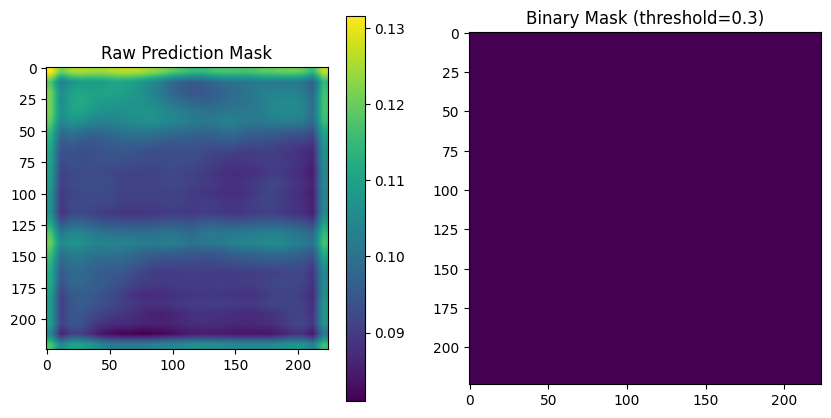

No valid needle contours found with threshold 0.3, trying lower threshold...


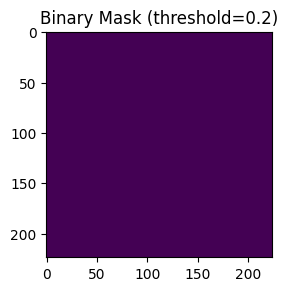

No valid needle contours found with threshold 0.2, trying lower threshold...


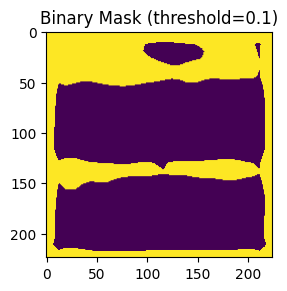

No valid needle contours found with threshold 0.1, trying lower threshold...


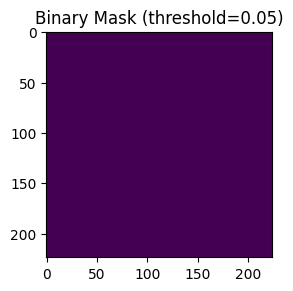

No valid needle contours found with threshold 0.05, trying lower threshold...
Could not find needle contours with any threshold!
Could not determine angle. Please check the debug visualizations above.


In [10]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import cv2
import math
from torchvision.models.segmentation import deeplabv3_resnet50
import matplotlib.pyplot as plt

def load_model(model_path):
    """Load the trained model"""
    model = deeplabv3_resnet50(pretrained=False, aux_loss=True)
    model.classifier[4] = torch.nn.Conv2d(256, 1, kernel_size=(1, 1), stride=(1, 1))
    state_dict = torch.load(model_path)
    model.load_state_dict(state_dict)
    return model

def calculate_angle(mask, debug=True):
    """Calculate angle between needle and negative y-axis with enhanced preprocessing"""
    # Try multiple thresholds
    thresholds = [0.3, 0.2, 0.1, 0.05]
    
    if debug:
        plt.figure(figsize=(10, 5))
        plt.subplot(121)
        plt.imshow(mask)
        plt.colorbar()
        plt.title("Raw Prediction Mask")
    
    for threshold in thresholds:
        # Convert mask to binary
        binary = (mask > threshold).astype(np.uint8)
        
        # Apply morphological operations to enhance the needle
        kernel = np.ones((3,3), np.uint8)
        binary = cv2.dilate(binary, kernel, iterations=1)
        
        if debug:
            plt.subplot(122)
            plt.imshow(binary)
            plt.title(f"Binary Mask (threshold={threshold})")
            plt.show()

        # Find contours
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if contours:
            # Filter contours by area and aspect ratio
            valid_contours = []
            for contour in contours:
                area = cv2.contourArea(contour)
                if area < 10:  # Skip very small contours
                    continue
                    
                # Get bounding rectangle
                rect = cv2.minAreaRect(contour)
                width = min(rect[1])
                length = max(rect[1])
                
                if length > 0 and width > 0:
                    aspect_ratio = length / width
                    if aspect_ratio > 3:  # Looking for elongated shapes
                        valid_contours.append(contour)
            
            if valid_contours:
                # Get the longest contour (should be the needle)
                needle = max(valid_contours, key=cv2.arcLength)
                
                if debug:
                    # Visualize the contour
                    debug_img = cv2.cvtColor(binary.copy(), cv2.COLOR_GRAY2BGR)
                    cv2.drawContours(debug_img, [needle], -1, (0, 255, 0), 2)
                    plt.figure(figsize=(5, 5))
                    plt.imshow(cv2.cvtColor(debug_img, cv2.COLOR_BGR2RGB))
                    plt.title("Detected Needle Contour")
                    plt.show()
                
                # Fit a line to the needle contour
                [vx, vy, x, y] = cv2.fitLine(needle, cv2.DIST_L2, 0, 0.01, 0.01)
                
                # Calculate angle with negative y-axis
                angle = math.degrees(math.atan2(vx[0], -vy[0]))
                
                # Normalize angle to be between 0 and 360 degrees
                if angle < 0:
                    angle += 360
                    
                return angle
                
        print(f"No valid needle contours found with threshold {threshold}, trying lower threshold...")
    
    print("Could not find needle contours with any threshold!")
    return None

def predict_gauge_angle(image_path, model_path, debug=True):
    """Predict the gauge angle from a single image"""
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Load model
    model = load_model(model_path)
    model = model.to(device)
    model.eval()
    
    # Prepare image
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Load and transform image
    image = Image.open(image_path).convert('RGB')
    input_tensor = transform(image).unsqueeze(0).to(device)
    
    if debug:
        plt.figure(figsize=(5, 5))
        plt.imshow(image)
        plt.title("Original Image")
        plt.show()
    
    # Get prediction
    with torch.no_grad():
        output = model(input_tensor)['out']
        mask = torch.sigmoid(output).squeeze().cpu().numpy()
    
    # Calculate angle
    angle = calculate_angle(mask, debug=debug)
    
    if angle is not None:
        print(f"Predicted gauge angle: {angle:.2f} degrees")
    else:
        print("WARNING: Could not determine angle!")
    
    return angle, mask

# Example usage
if __name__ == "__main__":
    model_path = "best_model.pth"
    test_image_path = "images/guage_image.jpg"
    
    angle, mask = predict_gauge_angle(test_image_path, model_path, debug=True)
    
    if angle is not None:
        print(f"Predicted gauge angle: {angle:.2f} degrees")
    else:
        print("Could not determine angle. Please check the debug visualizations above.")